In [1]:
import xarray as xr
import argparse
import numpy as np
import matplotlib.pyplot as plt
from wim_dateTime import createListDateTime
from datetime import datetime, timedelta
#import matplotlib.animation as animation
#from PIL import Image
#import glob
#import xarray as xr
import argparse
import subprocess
import warnings
import netCDF4 as nc
import numpy.ma as ma
import os
import xarray as xr
import matplotlib
from mpl_toolkits.axes_grid1 import AxesGrid

In [2]:
def get_geomWW3(path, file):
    '''
    This function reads the ni, nj, tlat, and tlon variables from a netcdf file
    '''
    fid = nc.Dataset("{}/{}".format(path, file), 'r')
    tlat = fid.variables['latitude'][:]
    tlon = fid.variables['longitude'][:]
    ni = fid.dimensions['lon'].size #ni is for lat, nj for lon
    nj = fid.dimensions['lat'].size

    return nj, ni, tlat, tlon

/aos/home/bward/wim/post-proc/case40/avg/iceh_avg.2006120100000-2007010100000.nc


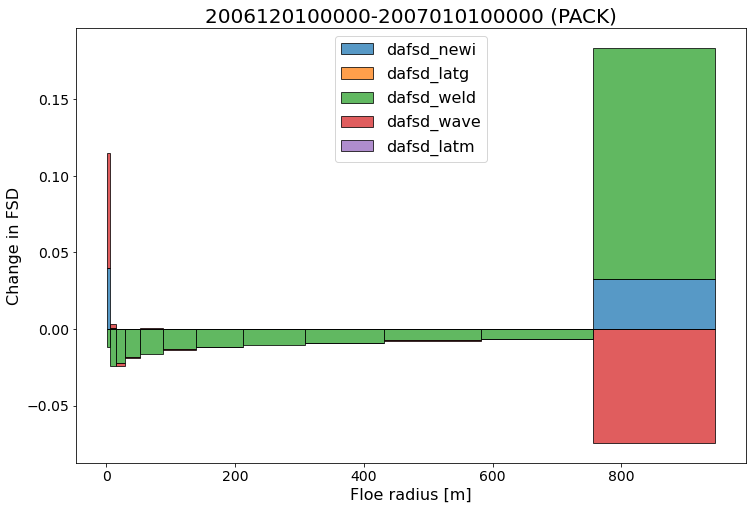

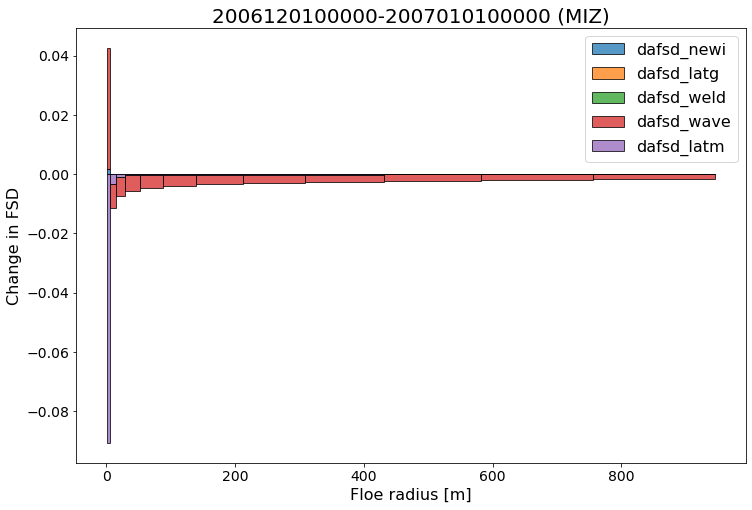

In [11]:
def plotHistFSDPack(dataNewi,dataWeld,dataLatg,dataWave,dataLatm, alat, aice, fig, axes, region):
#   fig, axes = plt.subplots(1,1,figsize=[12,8])
    binFSD=[6.65000000*10**-2,   5.31030847,   1.42865861*10**1,   2.90576686*10**1, 5.24122136*10**1,   8.78691405*10**1,   1.39518470*10**2, 2.11635752*10**2, 3.08037274*10**2, 4.31203059*10**2, 5.81277225*10**2, 7.55141047*10**2, 9.45812834*10**2]
    binCenter=[]
    binSpread=[]
    for b in range(len(binFSD)-1):
        binCenter.append((binFSD[b]+binFSD[b+1])/2)
        binSpread.append(binFSD[b+1]-binFSD[b])
        
    dataNewi_sum=np.zeros(dataNewi.shape[0])
    dataWeld_sum=np.zeros(dataNewi.shape[0])
    dataWave_sum=np.zeros(dataNewi.shape[0])
    dataLatg_sum=np.zeros(dataNewi.shape[0])
    dataLatm_sum=np.zeros(dataNewi.shape[0])
    
    if region == 'pack':
        for i in range(alat.shape[0]):
            for j in range(alat.shape[1]):
                if alat[i,j] >= 80 and aice[i,j]>0.2:
                    dataNewi_sum=dataNewi_sum+dataNewi[:,i,j]
                    dataWeld_sum=dataWeld_sum+dataWeld[:,i,j]
                    dataWave_sum=dataWave_sum+dataWave[:,i,j]
                    dataLatm_sum=dataLatm_sum+dataLatm[:,i,j]
                    dataLatg_sum=dataLatg_sum+dataLatg[:,i,j]
    elif region == 'miz':
        for i in range(alat.shape[0]):
            for j in range(alat.shape[1]):
                if alat[i,j] <= 0.2 and aice[i,j]<=0.2:
                    dataNewi_sum=dataNewi_sum+dataNewi[:,i,j]
                    dataWeld_sum=dataWeld_sum+dataWeld[:,i,j]
                    dataWave_sum=dataWave_sum+dataWave[:,i,j]
                    dataLatm_sum=dataLatm_sum+dataLatm[:,i,j]
                    dataLatg_sum=dataLatg_sum+dataLatg[:,i,j]

#     data_avg=np.squeeze(np.sum(np.squeeze(np.sum(data, axis=2)),axis=1))

    if region == 'pack':
        axes.bar(binCenter, dataNewi_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_newi')
        axes.bar(binCenter, dataLatg_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_latg',bottom=dataNewi_sum)
        axes.bar(binCenter, dataWeld_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_weld', bottom=[dataLatm_sum[0], dataLatm_sum[1], dataLatm_sum[2], dataLatm_sum[3], dataLatm_sum[4], dataLatm_sum[5],dataLatm_sum[6],dataLatm_sum[7],dataLatm_sum[8],dataLatm_sum[9],dataLatm_sum[10],dataNewi_sum[11]+dataLatg_sum[11]]) #,bottom=[0, 0, 0, 0, 0, 0,0,0,0,0,0,dataNewi_sum[11]+dataLatg_sum[11]])
        axes.bar(binCenter, dataWave_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_wave', bottom=[dataNewi_sum[0]+dataLatg_sum[0], dataNewi_sum[1]+dataLatg_sum[1], dataLatm_sum[2]+dataWeld_sum[2], dataLatm_sum[3]+dataWeld_sum[3], dataNewi_sum[4]+dataLatg_sum[4], dataWeld_sum[5]+dataLatm_sum[5],dataWeld_sum[6]+dataLatm_sum[6],dataNewi_sum[7]+dataLatg_sum[7],dataWeld_sum[8]+dataLatm_sum[8],dataWeld_sum[9]+dataLatm_sum[9],dataWeld_sum[10]+dataLatm_sum[10], dataLatm_sum[11]])
        axes.bar(binCenter, dataLatm_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_latm', bottom=np.zeros(12))
    if region == 'miz':
        axes.bar(binCenter, dataNewi_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_newi')
        axes.bar(binCenter, dataLatg_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_latg',bottom=dataNewi_sum)
        axes.bar(binCenter, dataWeld_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_weld', bottom=[dataLatg_sum[0], dataLatg_sum[1], dataLatg_sum[2], dataLatg_sum[3], dataLatg_sum[4], dataLatg_sum[5],dataLatg_sum[6],dataLatg_sum[7],dataLatg_sum[8],dataLatg_sum[9],dataLatg_sum[10],dataLatg_sum[11]]) #,bottom=[0, 0, 0, 0, 0, 0,0,0,0,0,0,dataNewi_sum[11]+dataLatg_sum[11]])
        axes.bar(binCenter, dataWave_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_wave', bottom=[dataNewi_sum[0]+dataLatg_sum[0],  dataLatm_sum[1]+dataWeld_sum[1], dataLatm_sum[2], dataLatm_sum[3], dataLatm_sum[4], dataLatm_sum[5],dataLatm_sum[6],dataLatm_sum[7],dataLatm_sum[8],dataLatm_sum[9],dataLatm_sum[10],dataLatm_sum[11]])
        axes.bar(binCenter, dataLatm_sum, width = np.array(binSpread), edgecolor='black',alpha=0.75, label='dafsd_latm', bottom=np.zeros(12))
#     axes.set_yscale('log')
    axes.set_ylabel('Change in FSD', size=16)
    axes.set_xlabel('Floe radius [m]', size=16)
    axes.tick_params(labelsize=14)
    axes.legend(prop={'size': 16})
#    axes.set_xlim([0, binFSD[11]+binSpread[11]])
#    axes.set_xscale('log')
    
def main():
    #Define variables
    
    exp='case40' #noWRS
    list_var=['dafsd_newi', 'dafsd_wave', 'dafsd_latg', 'dafsd_latm', 'dafsd_weld']
    
    start_day=datetime(2006, 12, 1)
    outfreq=1
    outfreqU='m'
    nb_ts=1
    
    list_avg=createListDateTime(start_day, outfreq, outfreqU, nb_ts+1)
    list_ts=createListDateTime(start_day, outfreq, outfreqU, nb_ts)
    grid='wimgx3'
    timeStep=3600
    REP_IN_W3_i='/aos/home/bward/wim/ww3/model/out/'+exp
    rep_data='/aos/home/bward/wim/post-proc/'+exp+'/avg'
    REP_OUT='/aos/home/bward/wim/post-proc/'+exp
    datetimeStart=start_day
    datestrStart=str(datetimeStart.year).zfill(4)+"-"+str(datetimeStart.month).zfill(2)+"-"+str(datetimeStart.day).zfill(2)+"-"+str(datetimeStart.hour*3600).zfill(5)
    file_strt="ww3."+datestrStart+".nc"
    rep_strt=REP_IN_W3_i
    nlon, nlat, t_lat, t_lon = get_geomWW3(rep_strt, file_strt)
    #Plot at each timestep
    i=1
    for ts in list_ts:
        strTimeIni=str(list_avg[i-1].year).zfill(4)+str(list_avg[i-1].month).zfill(2)+str(list_avg[i-1].day).zfill(2)+str(list_avg[i-1].hour*3600).zfill(5)
        strTimeEnd=str(list_avg[i].year).zfill(4)+str(list_avg[i].month).zfill(2)+str(list_avg[i].day).zfill(2)+str(list_avg[i].hour*3600).zfill(5)
        fileCI="iceh_avg."+strTimeIni+"-"+strTimeEnd+".nc"
        fileW3="none"
        datestr=strTimeIni+"-"+strTimeEnd
        dsAvg=xr.open_dataset(rep_data+'/'+fileCI)
        nvar=0
        print(rep_data+'/'+fileCI)
        fig, axes = plt.subplots(1,1,figsize=[12,8])
        figMIZ, axesMIZ=plt.subplots(1,1,figsize=[12,8])
        dataNewi=np.squeeze(np.nan_to_num(dsAvg['dafsd_newi'].values))
        dataWeld=np.squeeze(np.nan_to_num(dsAvg['dafsd_weld'].values))
        dataLatg=np.squeeze(np.nan_to_num(dsAvg['dafsd_latg'].values))
        dataWave=np.squeeze(np.nan_to_num(dsAvg['dafsd_wave'].values))
        dataLatm=np.squeeze(np.nan_to_num(dsAvg['dafsd_latm'].values))

        alat=np.squeeze(np.nan_to_num(dsAvg['TLAT'].values))
#             blat=np.reshape(np.repeat(alat[:, :, np.newaxis], data.shape[0], axis=2),[data.shape[0],data.shape[1],data.shape[2]])
#             maskNH=np.logical_or(blat<0, blat==0)
#             #Mask pack
        aice=np.squeeze(np.nan_to_num(dsAvg['aice'].values))
#             bice=np.reshape(np.repeat(aice[:, :, np.newaxis], data.shape[0], axis=2),[data.shape[0],data.shape[1],data.shape[2]])
#             mask_pack=np.logical_or(aice>0.8, aice>0.8)
            
            #mask_arraytest=np.logical_or(data <= 0, data<=0)
#             data=ma.masked_array(data, mask=maskNH)
# #             dataW3=np.zeros((data.shape[0],data.shape[1]))
           # dataUwnd=np.zeros((hs.shape[0],hs.shape[1]))
           # dataVwnd=np.zeros((hs.shape[0],hs.shape[1]))
           # dataW3=ma.masked_array(hs, mask=maskNH+mask_array)
           # dataUwnd=ma.masked_array(dataUwnd, mask=mask_array)
           # dataVwnd=ma.masked_array(dataVwnd, mask=mask_array)   
        plotHistFSDPack(dataNewi,dataWeld,dataLatg,dataWave,dataLatm, alat, aice, fig, axes, 'pack')
        plotHistFSDPack(dataNewi,dataWeld,dataLatg,dataWave,dataLatm, alat, aice, figMIZ, axesMIZ, 'miz')
        axes.set_title(datestr+" (PACK)", fontsize=20)
        axesMIZ.set_title(datestr+" (MIZ)", fontsize=20)
        
#         plt.tight_layout()
#         plt.subplots_adjust(top=0.97)
        
        fig.savefig(REP_OUT+"/"+exp+"_histFSD_pack_"+datestr+".png", dpi='figure', format='png', metadata=None,bbox_inches=None)
        figMIZ.savefig(REP_OUT+"/"+exp+"_histFSD_miz_"+datestr+".png", dpi='figure', format='png', metadata=None,bbox_inches=None)

#             plotHistFSDMIZ(data, alat, aice, figMIZ, axesMIZ)
          #  plotDafsdGx3(data, dataW3, dataUwnd, dataVwnd, fig, axes[nvar], nlon, nlat, t_lat, t_lon, REP_OUT, 'pcolor', var)
        i=i+1
#         axes[0].set_title(datestr, fontsize=20)
# #         plt.tight_layout()
# #         plt.subplots_adjust(top=0.97)
# #         fig.savefig(REP_OUT+"/"+exp+"_stress_"+datestr+".png", dpi='figure', format='png', metadata=None,bbox_inches=None)

#Call main
if __name__ == "__main__":
    main()

/aos/home/bward/wim/post-proc/case57/avg/iceh_avg.2006120100000-2007010100000.nc
/aos/home/bward/wim/post-proc/case40/avg/iceh_avg.2006120100000-2007010100000.nc


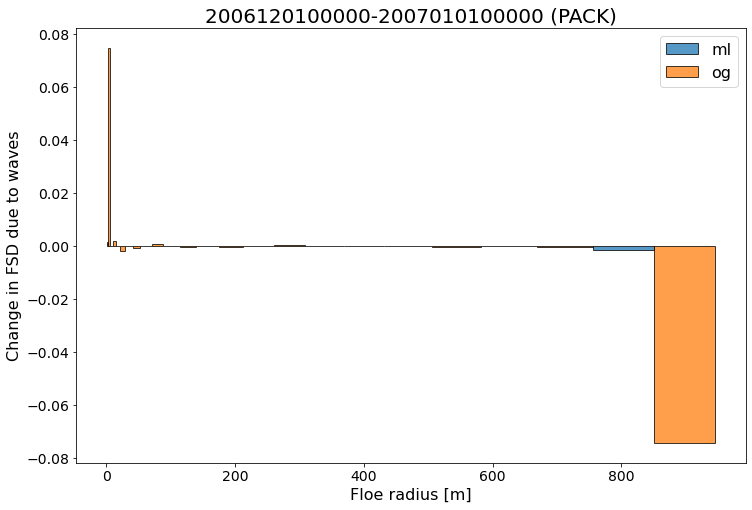

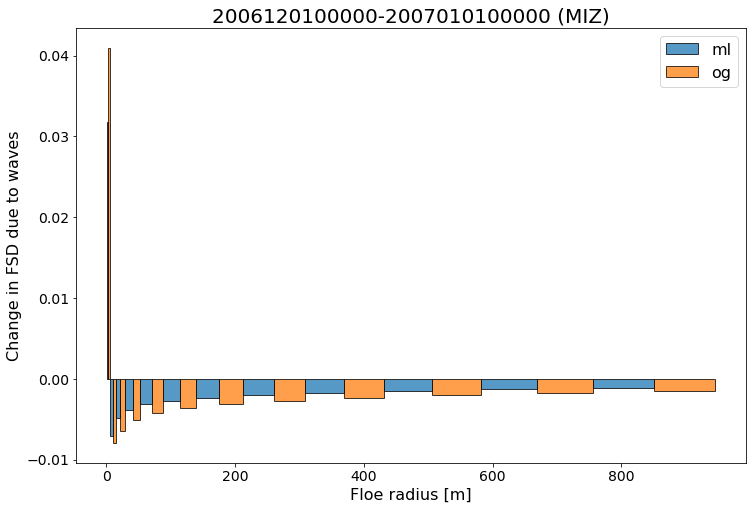

In [10]:
def compHistFSD(dataNewi,dataWeld, alat, aice, fig, axes, region):
#   fig, axes = plt.subplots(1,1,figsize=[12,8])
    binFSD=[6.65000000*10**-2,   5.31030847,   1.42865861*10**1,   2.90576686*10**1, 5.24122136*10**1,   8.78691405*10**1,   1.39518470*10**2, 2.11635752*10**2, 3.08037274*10**2, 4.31203059*10**2, 5.81277225*10**2, 7.55141047*10**2, 9.45812834*10**2]
    binCenter=[]
    binSpread=[]
    for b in range(len(binFSD)-1):
        binCenter.append((binFSD[b]+binFSD[b+1])/2)
        binSpread.append(binFSD[b+1]-binFSD[b])
        
    dataNewi_sum=np.zeros(dataNewi.shape[0])
    dataWeld_sum=np.zeros(dataNewi.shape[0])
    
    if region == 'pack':
        for i in range(alat.shape[0]):
            for j in range(alat.shape[1]):
                if alat[i,j] >= 80 and aice[i,j]>0.2:
                    dataNewi_sum=dataNewi_sum+dataNewi[:,i,j]
                    dataWeld_sum=dataWeld_sum+dataWeld[:,i,j]
    elif region == 'miz':
        for i in range(alat.shape[0]):
            for j in range(alat.shape[1]):
                if alat[i,j] <= 0.2 and aice[i,j]<=0.2:
                    dataNewi_sum=dataNewi_sum+dataNewi[:,i,j]
                    dataWeld_sum=dataWeld_sum+dataWeld[:,i,j]
                    
#     data_avg=np.squeeze(np.sum(np.squeeze(np.sum(data, axis=2)),axis=1))

    if region == 'pack':
        axes.bar(binCenter-np.array(binSpread)/4, dataNewi_sum, width = np.array(binSpread)/2, edgecolor='black',alpha=0.75, label='ml')
        axes.bar(binCenter+np.array(binSpread)/4, dataWeld_sum, width = np.array(binSpread)/2, edgecolor='black',alpha=0.75, label='og') #,bottom=[0, 0, 0, 0, 0, 0,0,0,0,0,0,dataNewi_sum[11]+dataLatg_sum[11]])
    if region == 'miz':
        axes.bar(binCenter-np.array(binSpread)/4, dataNewi_sum, width = np.array(binSpread)/2, edgecolor='black',alpha=0.75, label='ml')
        axes.bar(binCenter+np.array(binSpread)/4, dataWeld_sum, width = np.array(binSpread)/2, edgecolor='black',alpha=0.75, label='og') #,bottom=[0, 0, 0, 0, 0, 0,0,0,0,0,0,dataNewi_sum[11]+dataLatg_sum[11]])
#     axes.set_yscale('log')
    axes.set_ylabel('Change in FSD due to waves', size=16)
    axes.set_xlabel('Floe radius [m]', size=16)
    axes.tick_params(labelsize=14)
    axes.legend(prop={'size': 16})
   # axes.set_xlim([0, binFSD[11]+binSpread[11]])
  #  axes.set_xscale('log')

    
def main():
    #Define variables
    
    exp='case57' #noWRS
    exp2='case40'
    
    start_day=datetime(2006, 12, 1)
    outfreq=1
    outfreqU='m'
    nb_ts=1
    
    list_avg=createListDateTime(start_day, outfreq, outfreqU, nb_ts+1)
    list_ts=createListDateTime(start_day, outfreq, outfreqU, nb_ts)
    grid='wimgx3'
    timeStep=3600
    REP_IN_W3_i='/aos/home/bward/wim/ww3/model/out/'+exp
    rep_data='/aos/home/bward/wim/post-proc/'+exp+'/avg'
    rep_data2='/aos/home/bward/wim/post-proc/'+exp2+'/avg'
    REP_OUT='/aos/home/bward/wim/post-proc/'+exp
    datetimeStart=start_day
    datestrStart=str(datetimeStart.year).zfill(4)+"-"+str(datetimeStart.month).zfill(2)+"-"+str(datetimeStart.day).zfill(2)+"-"+str(datetimeStart.hour*3600).zfill(5)
    file_strt="ww3."+datestrStart+".nc"
    rep_strt=REP_IN_W3_i
    nlon, nlat, t_lat, t_lon = get_geomWW3(rep_strt, file_strt)
    #Plot at each timestep
    i=1
    for ts in list_ts:
        strTimeIni=str(list_avg[i-1].year).zfill(4)+str(list_avg[i-1].month).zfill(2)+str(list_avg[i-1].day).zfill(2)+str(list_avg[i-1].hour*3600).zfill(5)
        strTimeEnd=str(list_avg[i].year).zfill(4)+str(list_avg[i].month).zfill(2)+str(list_avg[i].day).zfill(2)+str(list_avg[i].hour*3600).zfill(5)
        fileCI="iceh_avg."+strTimeIni+"-"+strTimeEnd+".nc"
        fileW3="none"
        datestr=strTimeIni+"-"+strTimeEnd
        dsAvg=xr.open_dataset(rep_data+'/'+fileCI)
        dsAvg2=xr.open_dataset(rep_data2+'/'+fileCI)
        nvar=0
        print(rep_data+'/'+fileCI)
        print(rep_data2+'/'+fileCI)
        fig, axes = plt.subplots(1,1,figsize=[12,8])
        figMIZ, axesMIZ=plt.subplots(1,1,figsize=[12,8])
        dataWave1=np.squeeze(np.nan_to_num(dsAvg['dafsd_wave'].values))
        dataWave2=np.squeeze(np.nan_to_num(dsAvg2['dafsd_wave'].values))

        alat=np.squeeze(np.nan_to_num(dsAvg['TLAT'].values))
#             blat=np.reshape(np.repeat(alat[:, :, np.newaxis], data.shape[0], axis=2),[data.shape[0],data.shape[1],data.shape[2]])
#             maskNH=np.logical_or(blat<0, blat==0)
#             #Mask pack
        aice=np.squeeze(np.nan_to_num(dsAvg['aice'].values))
#             bice=np.reshape(np.repeat(aice[:, :, np.newaxis], data.shape[0], axis=2),[data.shape[0],data.shape[1],data.shape[2]])
#             mask_pack=np.logical_or(aice>0.8, aice>0.8)
            
            #mask_arraytest=np.logical_or(data <= 0, data<=0)
#             data=ma.masked_array(data, mask=maskNH)
# #             dataW3=np.zeros((data.shape[0],data.shape[1]))
           # dataUwnd=np.zeros((hs.shape[0],hs.shape[1]))
           # dataVwnd=np.zeros((hs.shape[0],hs.shape[1]))
           # dataW3=ma.masked_array(hs, mask=maskNH+mask_array)
           # dataUwnd=ma.masked_array(dataUwnd, mask=mask_array)
           # dataVwnd=ma.masked_array(dataVwnd, mask=mask_array)   
        compHistFSD(dataWave1,dataWave2, alat, aice, fig, axes, 'pack')
        compHistFSD(dataWave1,dataWave2, alat, aice, figMIZ, axesMIZ, 'miz')
        axes.set_title(datestr+" (PACK)", fontsize=20)
        axesMIZ.set_title(datestr+" (MIZ)", fontsize=20)
        
#         plt.tight_layout()
#         plt.subplots_adjust(top=0.97)
        
        fig.savefig(exp+"_compHistFSD_pack_"+datestr+".png", dpi='figure', format='png', metadata=None,bbox_inches=None)
        figMIZ.savefig(exp+"_compHistFSD_miz_"+datestr+".png", dpi='figure', format='png', metadata=None,bbox_inches=None)

#             plotHistFSDMIZ(data, alat, aice, figMIZ, axesMIZ)
          #  plotDafsdGx3(data, dataW3, dataUwnd, dataVwnd, fig, axes[nvar], nlon, nlat, t_lat, t_lon, REP_OUT, 'pcolor', var)
        i=i+1
#         axes[0].set_title(datestr, fontsize=20)
# #         plt.tight_layout()
# #         plt.subplots_adjust(top=0.97)
# #         fig.savefig(REP_OUT+"/"+exp+"_stress_"+datestr+".png", dpi='figure', format='png', metadata=None,bbox_inches=None)

#Call main
if __name__ == "__main__":
    main()

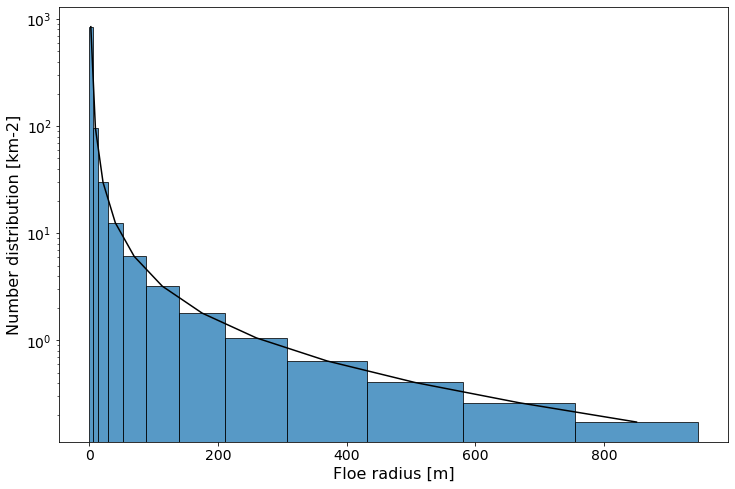

In [171]:
# case="case42"
# comment='multFrac_newi'
# REP_IN='/aos/home/bward/wim/cice/out/'+case+'/history'
# list_time=[7200, 10800, 14400, 18000]
binFSD=[6.65000000*10**-2,   5.31030847,   1.42865861*10**1,   2.90576686*10**1, 5.24122136*10**1,   8.78691405*10**1,   1.39518470*10**2, 2.11635752*10**2, 3.08037274*10**2, 4.31203059*10**2, 5.81277225*10**2, 7.55141047*10**2, 9.45812834*10**2]
binCenter=[]
binSpread=[]
for b in range(len(binFSD)-1):
    binCenter.append((binFSD[b]+binFSD[b+1])/2)
    binSpread.append(binFSD[b+1]-binFSD[b])

fig, axes = plt.subplots(1,1,figsize=[12,8])
alpha=2.1
c1=1
num_dis=np.zeros(len(binCenter))

for k in range(len(binCenter)):
    num_dis[k]=(2*binCenter[k])**(-alpha-c1)

temp=num_dis*binSpread*binCenter

temp=temp/np.sum(temp)
    
axes.plot(binCenter, temp*1000, 'k') #, width = np.array(binSpread), edgecolor='black',alpha=0.75)
axes.bar(binCenter, temp*1000, width = np.array(binSpread), edgecolor='black',alpha=0.75)
axes.set_yscale('log')
axes.set_ylabel('Number distribution [km-2]', size=16)
axes.set_xlabel('Floe radius [m]', size=16)
axes.tick_params(labelsize=14)
#axes.set_xscale('log')''

In [5]:
# case="case42"
# comment='multFrac_newi'
# REP_IN='/aos/home/bward/wim/cice/out/'+case+'/history'
# list_time=[7200, 10800, 14400, 18000]
# binFSD=[6.65000000*10**-2,   5.31030847,   1.42865861*10**1,   2.90576686*10**1, 5.24122136*10**1,   8.78691405*10**1,   1.39518470*10**2, 2.11635752*10**2, 3.08037274*10**2, 4.31203059*10**2, 5.81277225*10**2, 7.55141047*10**2, 9.45812834*10**2]
# binCenter=[]
# binSpread=[]
# for b in range(len(binFSD)-1):
#     binCenter.append((binFSD[b]+binFSD[b+1])/2)
#     binSpread.append(binFSD[b+1]-binFSD[b])

# list_lat=[96] #,100,104,108]
# list_lon=[61]

# for j in list_lat:
#     for i in list_lon:
#         fig3, axes3 = plt.subplots(len(list_time),2,figsize=[14,8*len(list_time)],gridspec_kw={'width_ratios': [3, 1]})
#         fig2,axes2= plt.subplots(len(list_time),1,figsize=[14,8*len(list_time)])
#         fig, axes = plt.subplots(len(list_time),1,figsize=[26,8*len(list_time)])
#         compteur=0
#         for time in list_time:
#             tm1=f'{time-3600:05}'
#             file_nc_tm1=REP_IN+"/iceh_01h.1997-01-01-"+tm1+".nc"
#             ds_tm1=xr.open_dataset(file_nc_tm1)
#             afsd_tm1=np.squeeze(np.nan_to_num(ds_tm1['afsd'].values))[:,j,i]*np.array(binSpread)
#             aice_tm1=np.squeeze(np.nan_to_num(ds_tm1['aice'].values))[j,i]
#             aicen_tm1=np.squeeze(np.nan_to_num(ds_tm1['aicen'].values))[:,j,i]
#             fsdrad_tm1=np.squeeze(np.nan_to_num(ds_tm1['fsdrad'].values))[j,i]
#             weld_tm1=np.squeeze(np.nan_to_num(ds_tm1['dafsd_weld'].values))[:,j,i]
#             latm_tm1=np.squeeze(np.nan_to_num(ds_tm1['dafsd_latm'].values))[:,j,i]
#             latg_tm1=np.squeeze(np.nan_to_num(ds_tm1['dafsd_latg'].values))[:,j,i]
#             newi_tm1=np.squeeze(np.nan_to_num(ds_tm1['dafsd_newi'].values))[:,j,i]
#             wave_tm1=np.squeeze(np.nan_to_num(ds_tm1['dafsd_wave'].values))[:,j,i]
            
#             t=f'{time:05}'
#             file_nc_t=REP_IN+"/iceh_01h.1997-01-01-"+t+".nc"
#             ds_t=xr.open_dataset(file_nc_t)
#             afsd_t=np.squeeze(np.nan_to_num(ds_t['afsd'].values))[:,j,i]*np.array(binSpread)
#             #afsdn_t=np.squeeze(np.nan_to_num(ds_t['afsdn'].values))[:,:,j,i]
#             aice_t=np.squeeze(np.nan_to_num(ds_t['aice'].values))[j,i]
#             aicen_t=np.squeeze(np.nan_to_num(ds_t['aicen'].values))[:,j,i]
#             fsdrad_t=np.squeeze(np.nan_to_num(ds_t['fsdrad'].values))[j,i]
#             weld_t=np.squeeze(np.nan_to_num(ds_t['dafsd_weld'].values))[:,j,i]
#             latm_t=np.squeeze(np.nan_to_num(ds_t['dafsd_latm'].values))[:,j,i]
#             latg_t=np.squeeze(np.nan_to_num(ds_t['dafsd_latg'].values))[:,j,i]
#             newi_t=np.squeeze(np.nan_to_num(ds_t['dafsd_newi'].values))[:,j,i]
#             wave_t=np.squeeze(np.nan_to_num(ds_t['dafsd_wave'].values))[:,j,i]
            
#             tp1=f'{time+3600:05}'
#             file_nc_tp1=REP_IN+"/iceh_01h.1997-01-01-"+tp1+".nc"
#             ds_tp1=xr.open_dataset(file_nc_tp1)
#             afsd_tp1=np.squeeze(np.nan_to_num(ds_tp1['afsd'].values))[:,j,i]*np.array(binSpread)
#             #afsdn_tp1=np.squeeze(np.nan_to_num(ds_tp1['afsdn'].values))[:,:,j,i]
#             aice_tp1=np.squeeze(np.nan_to_num(ds_tp1['aice'].values))[j,i]
#             aicen_tp1=np.squeeze(np.nan_to_num(ds_tp1['aicen'].values))[:,j,i]
#             fsdrad_tp1=np.squeeze(np.nan_to_num(ds_tp1['fsdrad'].values))[j,i]
#             weld_tp1=np.squeeze(np.nan_to_num(ds_tp1['dafsd_weld'].values))[:,j,i]
#             latm_tp1=np.squeeze(np.nan_to_num(ds_tp1['dafsd_latm'].values))[:,j,i]
#             latg_tp1=np.squeeze(np.nan_to_num(ds_tp1['dafsd_latg'].values))[:,j,i]
#             newi_tp1=np.squeeze(np.nan_to_num(ds_tp1['dafsd_newi'].values))[:,j,i]
#             wave_tp1=np.squeeze(np.nan_to_num(ds_tp1['dafsd_wave'].values))[:,j,i]
            
#             lat=np.squeeze(np.nan_to_num(ds_t['TLAT'].values))
#             lon=np.squeeze(np.nan_to_num(ds_t['TLON'].values))

#             axes3[compteur,0].set_xlabel('Floe size categorie [m]',size=18)
#             axes3[compteur,0].set_ylabel('Areal floe size distribution',size=18)
#             axes3[compteur,0].tick_params(axis='both', which='major', labelsize=16)
#             axes3[compteur,0].axvline(x = fsdrad_t,label = 'Rep. radius at t',color='red', ls='--', lw = 0.5)
#             axes3[compteur,0].axvline(x = fsdrad_tp1,label = 'Rep. radius at tp1', ls='--', lw = 0.5)
#             axes3[compteur,0].axvline(x = fsdrad_tm1,label = 'Rep. radius at tm1', color='k', ls='--', lw = 0.5)
#             axes3[compteur,0].bar(binCenter,afsd_tm1, width = np.array(binSpread), edgecolor='black',alpha=0.75, color='k', label='t='+tm1)
#             axes3[compteur,0].bar(binCenter,afsd_t, width = np.array(binSpread), edgecolor='black',alpha=0.5, color='red', label='t='+t)
#             axes3[compteur,0].bar(binCenter,afsd_tp1, width = np.array(binSpread), edgecolor='black', alpha=0.25, label='t='+tp1)
#             axes3[compteur,0].legend()
#             axes3[compteur,0].title.set_text("afsd "+ "Location : "+ str(lon[j,i])+'\u00B0E '+str(lat[j,i])+'\u00B0N')
#             axes3[compteur,0].title.set_size(24)
            
#             columns = ('aice', '\u03A3aicen', '\u03A3afsd', '\u03A3\u03A3afsdn')
#             rows = ['t='+str(tm1), 't='+str(t), 't='+str(tp1)]

            # Get some pastel shades for the colors
#             n_rows = len(rows)

#             # Plot bars and create text labels for the table
#             cell_text = []
#             sum_aicen_tm1=np.sum(aicen_tm1)
#             sum_aicen_t=np.sum(aicen_t)
#             sum_aicen_tp1=np.sum(aicen_tp1)

#             sum_afsd_tm1=np.sum(afsd_tm1[:])
#             sum_afsd_t=np.sum(afsd_t[:])
#             sum_afsd_tp1=np.sum(afsd_tp1[:])

#             sum_afsdn_tm1=np.nan
#             sum_afsdn_t=np.nan
#             sum_afsdn_tp1=np.nan
# #             sum_afsdn_t=np.sum(np.sum(afsdn_t,axis=0)*np.array(binSpread))
# #             sum_afsdn_tp1=np.sum(np.sum(afsdn_tp1,axis=0)*np.array(binSpread))

#             for row in range(n_rows):
#                 if rows[row]=='t='+str(tm1): 
#                     cell_text.append([ '%.6f' % aice_tm1,  '%.6f' % sum_aicen_tm1,  '%.6f' % sum_afsd_tm1, '%.6f' %  sum_afsdn_tm1])
#                 elif rows[row]=='t='+str(t): 
#                     cell_text.append([ '%.6f' % aice_t, '%.6f' % sum_aicen_t, '%.6f' % sum_afsd_t, '%.6f' % sum_afsdn_t])
#                 elif rows[row]=='t='+str(tp1): 
#                     cell_text.append([ '%.6f ' % aice_tp1,  '%.6f' % sum_aicen_tp1,  '%.6f' % sum_afsd_tp1,  '%.6f' % sum_afsdn_tp1])


#             # Reverse colors and text labels to display the last value at the top.
#             axes3[compteur,1].axis('off')
#             the_table = axes3[compteur,1].table(cellText=cell_text,
#                           rowLabels=rows,
#                           colLabels=columns,
#                           loc='center')
#             the_table.set_fontsize(16)
#             the_table.scale(1.2, 4) 
            
#             dafsd=afsd_tp1-afsd_t
#             newi=newi_t*afsd_tp1/aice_t
#             #newi=newi_t
#             latg=latg_tp1
#             #latg=latg_tp1*np.array(binSpread)
#             latm=latm_tp1
#             weld=weld_tp1
#             wave=wave_tp1
#             sum_thermo=newi+latg+latm+weld+wave
#             diff=sum_thermo-dafsd

#             axes2[compteur].title.set_text("Variation of afsd. "+ "Location : "+ str(lon[j,i])+'\u00B0E '+str(lat[j,i])+'\u00B0N'+" Timestep : "+f'{time-3600:05}'+'-'+f'{time:05}')
#             axes2[compteur].title.set_size(24)
#             axes2[compteur].set_xlabel('Floe size categorie [m]',size=18)
#             axes2[compteur].set_ylabel('\u0394 afsd',size=18)
#             axes2[compteur].tick_params(axis='both', which='major', labelsize=16)

#             axes2[compteur].bar(binCenter,newi, width = np.array(binSpread), edgecolor='none', color='tab:cyan',alpha=0.25, label='dafsd_newi')
#             axes2[compteur].bar(binCenter,latm, width = np.array(binSpread), edgecolor='none', color='tab:red',alpha=0.25,label='dafsd_latm')
#             axes2[compteur].bar(binCenter,latg, width = np.array(binSpread), edgecolor='none', color='tab:blue',alpha=0.25, label='dafsd_latg', bottom=newi)
#             axes2[compteur].bar(binCenter,weld, width = np.array(binSpread), edgecolor='none', color='tab:green', alpha=0.25, label='dafsd_weld', bottom=newi+latg)
#             axes2[compteur].bar(binCenter,wave, width = np.array(binSpread), edgecolor='none', color='tab:orange', alpha=0.25, label='dafsd_wave', bottom=newi+latg)
#             axes2[compteur].bar(binCenter,dafsd, width = np.array(binSpread), edgecolor='black', color='none', label='dafsd')
#             axes2[compteur].legend()

#             columns = ('nfsd = 1', 'nfsd = 2', 'nfsd = 3', 'nfsd = 4', 'nfsd = 5', 'nfsd = 6', 'nfsd = 7', 'nfsd = 8', 'nfsd = 9', 'nfsd = 10', 'nfsd = 11', 'nfsd = 12', 'total')
#             rows = ['newi', 'latg', 'latm', 'weld', 'wave','sum', 'dafsd', 'diff']

#             # Get some pastel shades for the colors
#             n_rows = len(rows)
#             n_col = len(columns)

#                 # Plot bars and create text labels for the table
#             cell_text = []
#             for row in range(n_rows):
#                 col_text=[]
#                 for col in range(n_col):
#                     if rows[row]=='newi':
#                         if (col != n_col-1):
#                             col_text.append("%.5e" % newi[col])
#                         elif (col == n_col-1):
#                             col_text.append("%.5e" % np.sum(newi))
#                     elif rows[row]=='latg': 
#                         if (col != n_col-1):
#                             col_text.append("%.5e" % latg[col])
#                         elif (col == n_col-1):
#                             col_text.append("%5e" % np.sum(latg))                    
#                     elif rows[row]=='latm':
#                         if (col != n_col-1):
#                             col_text.append("%5e" % latm[col])
#                         elif (col == n_col-1):
#                             col_text.append("%5e" % np.sum(latm))
#                     elif rows[row]=='wave':
#                         if (col != n_col-1):
#                             col_text.append("%5e" % wave[col])
#                         elif (col == n_col-1):
#                             col_text.append("%5e" % np.sum(wave))
#                     elif rows[row]=='weld': 
#                         if (col != n_col-1):
#                             col_text.append("%5e" % weld[col])
#                         elif (col == n_col-1):
#                             col_text.append("%5e" % np.sum(weld))
#                     elif rows[row]=='sum': 
#                         if (col != n_col-1):
#                             col_text.append("%5e" % sum_thermo[col])
#                         elif (col == n_col-1):
#                             col_text.append("%5e" % np.sum(sum_thermo))
#                     elif rows[row]=='dafsd': 
#                         if (col != n_col-1):
#                             col_text.append("%5e" % dafsd[col])
#                         elif (col == n_col-1):
#                             col_text.append("%5e" % np.sum(dafsd))
#                     elif rows[row]=='diff': 
#                         if (col != n_col-1):
#                             col_text.append("%5e" % diff[col])
#                         elif (col == n_col-1):
#                             col_text.append("%5e" % np.sum(diff))
#                 cell_text.append(col_text)

#             # Reverse colors and text labels to display the last value at the top.
#             axes[compteur].title.set_text("Variation of afsd. "+ "Location : "+ str(lon[j,i])+'\u00B0E '+str(lat[j,i])+'\u00B0N'+" Timestep : "+f'{time-3600:05}'+'-'+f'{time:05}')
#             axes[compteur].title.set_size(24)
#             axes[compteur].axis('off')
#             the_table = axes[compteur].table(cellText=cell_text,
#                           rowLabels=rows,
#                           colLabels=columns,
#                           loc='center')
#             the_table.set_fontsize(18)
#             the_table.scale(1.4, 3) 
#             compteur=compteur+1
            
#         fig3.tight_layout()
#         fig3.subplots_adjust(top=1)
#         fig3.savefig('/aos/home/bward/wim/post-proc/test/fsd/'+case+'_hist_afsd'+'_j'+str(j)+'_i'+str(i)+'_nts'+str(len(list_time))+'_'+comment, bbbox_to_anchor='tight', dpi=500)
        
#         fig2.tight_layout()
#         fig2.subplots_adjust(top=1)
#         fig2.savefig('/aos/home/bward/wim/post-proc/test/fsd/'+case+'_hist_dafsd'+'_j'+str(j)+'_i'+str(i)+'_nts'+str(len(list_time))+'_'+comment, bbbox_to_anchor='tight', dpi=500)
        
#         fig.tight_layout()
#         fig.subplots_adjust(top=1)
#         fig.savefig('/aos/home/bward/wim/post-proc/test/fsd/'+case+'_table_dafsd'+'_j'+str(j)+'_i'+str(i)+'_nts'+str(len(list_time))+'_'+comment, bbbox_to_anchor='tight', dpi=500)